4/4 [==============================] - 0s 1000us/step


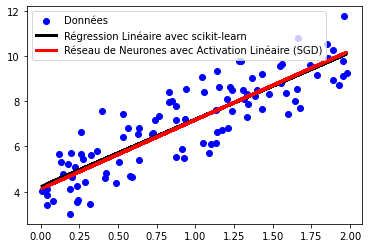

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Générer des données aléatoires
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Créer et entraîner le modèle de régression linéaire avec scikit-learn
model_lr = LinearRegression()
model_lr.fit(X, y)

# Créer et entraîner le modèle avec Keras et SGD
model_nn_linear = Sequential()
model_nn_linear.add(Dense(units=1, input_dim=1, activation='linear'))
model_nn_linear.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')
model_nn_linear.fit(X, y, epochs=20, batch_size=10, verbose=0)

# Afficher les résultats
plt.scatter(X, y, color='blue', label='Données')
plt.plot(X, model_lr.predict(X), color='black', linewidth=3, label='Régression Linéaire avec scikit-learn')
plt.plot(X, model_nn_linear.predict(X), color='red', linewidth=3, label='Réseau de Neurones avec Activation Linéaire (SGD)')
plt.legend()
plt.show()


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

c:\Users\anton\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



11490434/11490434 [==============================] - 1s 0us/step


In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

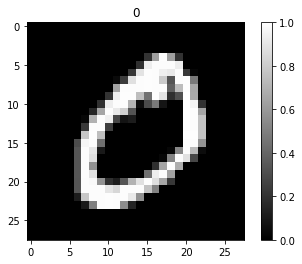

In [14]:
from matplotlib import pyplot as plt 
n = 1
plt.imshow(x_train[n,:,:],cmap="gray")
plt.title(y_train[n])
plt.colorbar()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import classification_report
import numpy as np 

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam'
              , loss = 'sparse_categorical_crossentropy'
              , metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))
y_pred = np.argmax( model.predict(x_test) ,axis=-1)


print("Classification report ", classification_report(y_test,y_pred))


Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.9025 - val_loss: 0.2057 - val_accuracy: 0.9387
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1684 - accuracy: 0.9520 - val_loss: 0.1411 - val_accuracy: 0.9591
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1208 - accuracy: 0.9652 - val_loss: 0.1156 - val_accuracy: 0.9648
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9742 - val_loss: 0.0994 - val_accuracy: 0.9698
Epoch 5/5
313/313 [==============================] - 0s 668us/step
Classification report                precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.